# Mathematics of Finance
# Project 2.1
# Daniel Cohen, Brian Livian
# 11/2/22

## Formulas
<font size="4"> $ [(uc^{-1}u^{T})^{2} \sigma_{0}^{2} - uc^{-1}u^{T}]\lambda_{2}^{2} + [2uc^{-1}m^{T} - 2(mc^{-1}u^{T})(uc^{-1}u^{T})\sigma_{0}^{2}]\lambda_{2}+ (mc^{-1}u^{T})^{2}\sigma_{0}^{2} - mc^{-1}m^{T} = 0$ </font>




<font size="8"> $ w = \frac{(m - \lambda_{2}u)c^{-1}}{(m - \lambda_{2}u)c^{-1}u^{T}}$ </font>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
stock1 = 'TSLA'
stock2 = 'AAPL'
stock3 = 'WMT'
data = yf.download(stock1 + ' ' + stock2 + ' ' + stock3
                   ,start="2021-01-01")
data = data['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
dataPct = data.pct_change().dropna()

In [ ]:
data.head()

,AAPL,TSLA,WMT
Date,,,
2021-01-04,128.087082,243.256668,142.539413
2021-01-05,129.670715,245.036667,141.780624
2021-01-06,125.305794,251.993332,142.665863
2021-01-07,129.581619,272.013336,142.656128
2021-01-08,130.700089,293.339996,142.636688


In [ ]:
dataPct.head()

,AAPL,TSLA,WMT
Date,,,
2021-01-05,0.012364,0.007317,-0.005323
2021-01-06,-0.033662,0.028390,0.006244
2021-01-07,0.034123,0.079447,-0.000068
2021-01-08,0.008631,0.078403,-0.000136
2021-01-11,-0.023249,-0.078214,0.004501


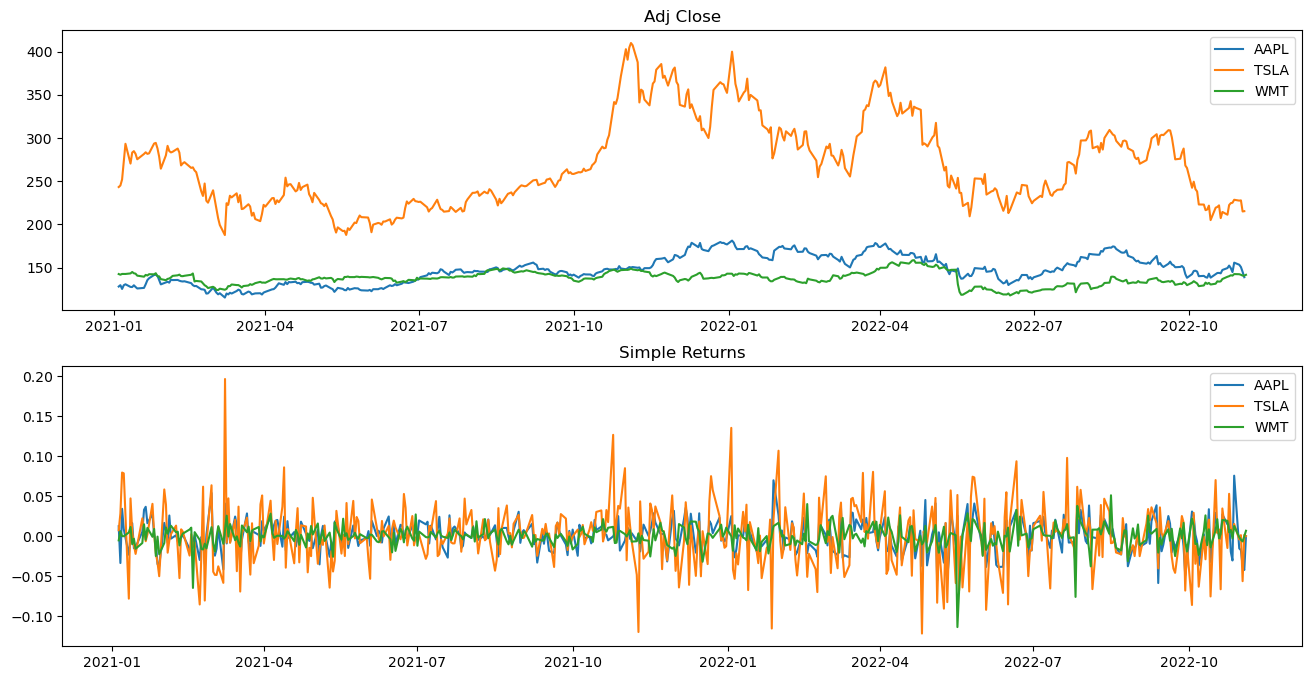

In [ ]:
plt.figure(figsize = (16,8), facecolor = 'white')
plt.subplot(2,1,1)
plt.plot(data, label = data.columns)
plt.title('Adj Close')
plt.legend()

plt.subplot(2,1,2)
plt.plot(dataPct, label = dataPct.columns)
plt.legend()
plt.title('Simple Returns')
plt.show()

In [ ]:
dataPct.describe()

,AAPL,TSLA,WMT
count,464.000000,464.000000,464.000000
mean,0.000355,0.000442,0.000085
std,0.019008,0.037637,0.013903
min,-0.058680,-0.121841,-0.113758
25%,-0.010398,-0.021458,-0.006435
50%,0.000210,0.001573,0.000460
75%,0.012843,0.020411,0.007933
max,0.075553,0.196412,0.051056


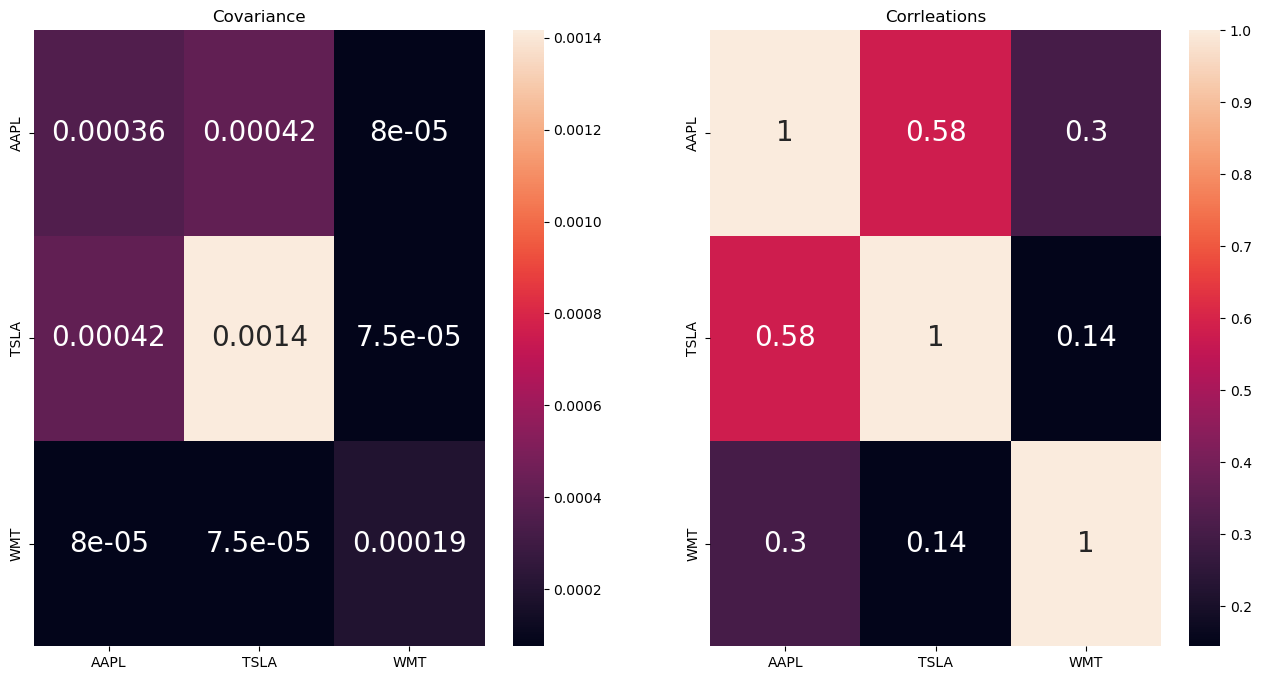

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.heatmap(dataPct.cov(), annot = True, annot_kws={"fontsize":20})
plt.title('Covariance')
plt.subplot(1,2,2)
sns.heatmap(dataPct.corr(), annot = True, annot_kws={"fontsize":20})
plt.title('Corrleations')
plt.show()

## Part 1: Minimum Risk

In [ ]:
m = dataPct.mean().values
C = np.array(dataPct.cov())
u = np.ones(len(dataPct.columns))
wmin = np.dot(u,np.linalg.inv(C)) / np.dot(np.dot(u, np.linalg.inv(C)),u)
print('Weights: '+ str(data.columns.values) + str(wmin))
minMuv = np.dot(wmin, m)
print('Minimum Risk Portfolio Expectation = ' + str(minMuv))
minVarv = np.dot(np.dot(wmin, C), wmin)
print('Minimum Risk Portfolio Risk = ' + str(np.sqrt(minVarv)))

Weights: ['AAPL' 'TSLA' 'WMT'][ 0.30157675 -0.01289125  0.7113145 ]
Minimum Risk Portfolio Expectation = 0.0001616510230263
Minimum Risk Portfolio Risk = 0.012679098220772516


## Part 2: Increasing risk by 20%


In [ ]:
# Increase risk by 20%
Var120P = (1.2 * np.sqrt(minVarv))**2

#Defining some values so calculation for quadratic is cleaner
m = dataPct.mean().values
C = np.array(dataPct.cov())
u = np.ones(len(dataPct.columns))
cinv = np.linalg.inv(C)
ucinv = np.dot(u, cinv)
mcinv = np.dot(m, cinv)


# Plugging in for formula given on top of notebook:
a = Var120P * np.dot(ucinv, u)**2 - np.dot(ucinv, u)
b = 2*np.dot(ucinv,m) - 2*np.dot(mcinv,u)*np.dot(ucinv,u)*Var120P
# b = np.dot(ucinv, m) + np.dot(mcinv, u)- 2*Var120P*sum(np.dot(m,np.dot(ucinv, u)))
# b = np.dot(ucinv, m) + np.dot(mcinv, u)- 2*Var120P*np.dot(m, ucinv)
c = Var120P* np.dot(mcinv, u)**2  - np.dot(mcinv, m)

# Define quadratic formula
def quadraticformula(a,b,c):
    return np.array([(-b + np.sqrt((b**2) - 4*a*c))/ (2*a), (-b - np.sqrt((b**2) - 4*a*c))/ (2*a)])

# Solve for lambda 2 using quadratic formula
lambda2 = quadraticformula(a,b,c)

# 1ambda1 irrelevant for this calculation
# lambda1 = (m - np.dot(lambda2,u))*np.dot(cinv, np.transpose(u))/2
# lambda1

# Solve for new weights (formula given on top of notebook)
# Note two sets of weights because quadratic formula (lambda2) gives two values. 
# Will pick the weights with higher expectation
w = [(np.dot(m - lambda2[0] * u, cinv))/ np.dot(np.dot(m - lambda2[0]*u, cinv),u),
     (np.dot(m - lambda2[1] * u, cinv))/ np.dot(np.dot(m - lambda2[1]*u, cinv),u)]
w = w[0] if np.dot(w,m)[0] > np.dot(w,m)[1] else w[1]
print('Weights: '+ str(data.columns.values) + str(w))
print('Expectation: ' + str(np.dot(w,m)))
print('Risk: ' + str(np.sqrt(Var120P)))

Weights: ['AAPL' 'TSLA' 'WMT'][0.68766655 0.01757459 0.29475887]
Expectation: 0.00027671705820205407
Risk: 0.015214917864927019
